In [17]:
# importação de bibliotecas
import pandas as pd
import requests 
import json
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
url = ('https://api.github.com/users/DanielCauldron')# URL da API do GitHub

In [19]:
response = requests.get(url)# Faz a requisição para a API


In [20]:
if response.status_code == 200:# Verifica se a requisição foi bem-sucedida
    data = response.json()
    

In [21]:
nome = data.get("name")
nome_usuario = data.get("login")
repositorios_publicos = data.get("public_repos")
data_criacao = data.get("created_at")
data_formatada = datetime.strptime(data_criacao, "%Y-%m-%dT%H:%M:%SZ")
data_formatada = data_formatada.strftime("%d/%m/%Y às %H:%M")

In [22]:
print("Nome", nome)
print("nome de usuario", nome_usuario)
print("Repositórios públicos:", repositorios_publicos)
print("Data da criação da conta:", data_formatada)


Nome Daniel Caldeirão
nome de usuario DanielCauldron
Repositórios públicos: 22
Data da criação da conta: 20/07/2022 às 19:13


                            verificar repositorios

In [23]:
url_repos = ('https://api.github.com/users/DanielCauldron/repos')#

In [24]:
response = requests.get(url_repos)# Faz a requisição para a API de repositórios

In [25]:
if response.status_code == 200:# Verifica se a requisição foi bem-sucedida
    repos_data = response.json()

In [29]:

repos_list = []
for repo in repos_data:
    repos_list.append({
        "Nome": repo.get("name"),
        "Descrição": repo.get("description"),
        "URL": repo.get("html_url"),
        "Linguagem": repo.get("language"),  # Corrigido aqui
        "Data da criação da conta": repo.get("created_at")
    })
df = pd.DataFrame(repos_list)  # Fora do loop
df.head()  # Exibe o DataFrame no Jupyter


,Nome,Descrição,URL,Linguagem,Data da criação da conta
0,-Sistema-Banc-rio-com-Fun-es-Python,"Desafio de projeto de estudo, construindo proj...",https://github.com/DanielCauldron/-Sistema-Ban...,Python,2023-07-06T13:37:18Z
1,01-Ingestao-de-Dados-Excel-API,None,https://github.com/DanielCauldron/01-Ingestao-...,Python,2025-06-14T04:48:03Z
2,02-Pipelines-de-Ingestao-,None,https://github.com/DanielCauldron/02-Pipelines...,Python,2025-06-21T20:36:38Z
3,7DaysOfCode-Python-Pandas,None,https://github.com/DanielCauldron/7DaysOfCode-...,Jupyter Notebook,2025-08-09T02:55:25Z
4,Analise-de-Dados-com--Python,None,https://github.com/DanielCauldron/Analise-de-D...,Jupyter Notebook,2023-04-13T19:34:20Z


In [27]:

import pandas as pd

# Criação da lista com os dados relevantes de cada repositório
repos_list = [
    {
        "Nome": repo.get("name"),
        "Link": repo.get("html_url"),
        "Linguagem": repo.get("language"),
        "Data de Criação": repo.get("created_at")
    }
    for repo in repos_data
]

# Criação do DataFrame a partir da lista
df = pd.DataFrame(repos_list)

# Conversão da coluna de data para datetime (e remoção da hora)
df["Data de Criação"] = pd.to_datetime(df["Data de Criação"]).dt.date

# Reorganização opcional das colunas (se desejar uma ordem específica)
colunas = ["Nome", "Link", "Linguagem", "Data de Criação"]
df = df[colunas]

# Exibe as 5 primeiras linhas do DataFrame (útil em Jupyter Notebooks)
df.head()





,Nome,Link,Linguagem,Data de Criação
0,-Sistema-Banc-rio-com-Fun-es-Python,https://github.com/DanielCauldron/-Sistema-Ban...,Python,2023-07-06
1,01-Ingestao-de-Dados-Excel-API,https://github.com/DanielCauldron/01-Ingestao-...,Python,2025-06-14
2,02-Pipelines-de-Ingestao-,https://github.com/DanielCauldron/02-Pipelines...,Python,2025-06-21
3,7DaysOfCode-Python-Pandas,https://github.com/DanielCauldron/7DaysOfCode-...,Jupyter Notebook,2025-08-09
4,Analise-de-Dados-com--Python,https://github.com/DanielCauldron/Analise-de-D...,Jupyter Notebook,2023-04-13


C:\Users\PC\AppData\Local\Temp\ipykernel_6660\2485327187.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


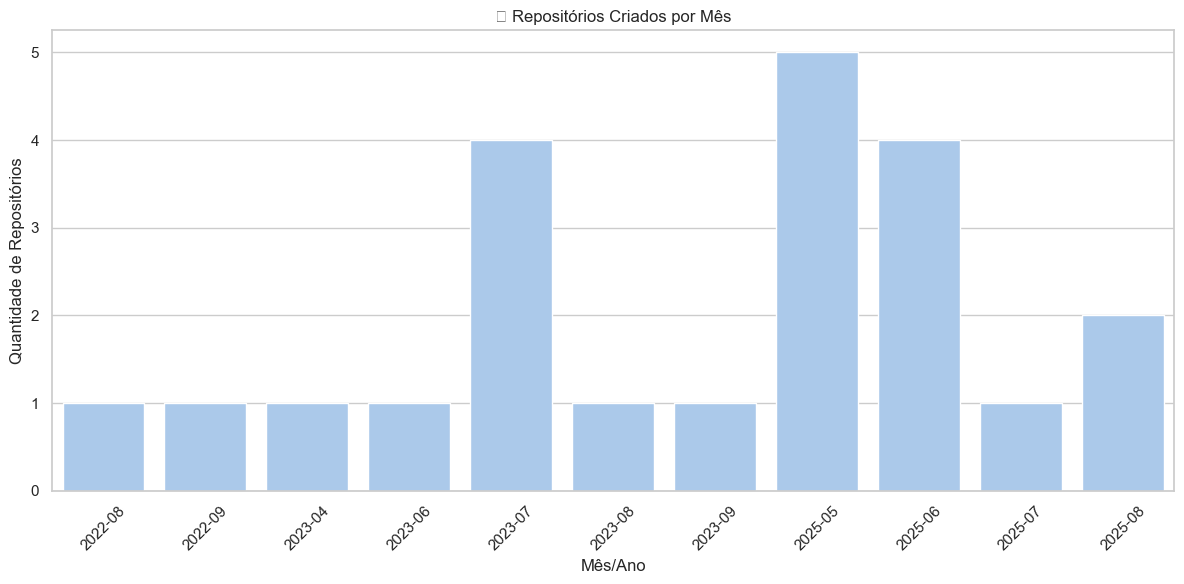

C:\Users\PC\AppData\Local\Temp\ipykernel_6660\2485327187.py:34: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


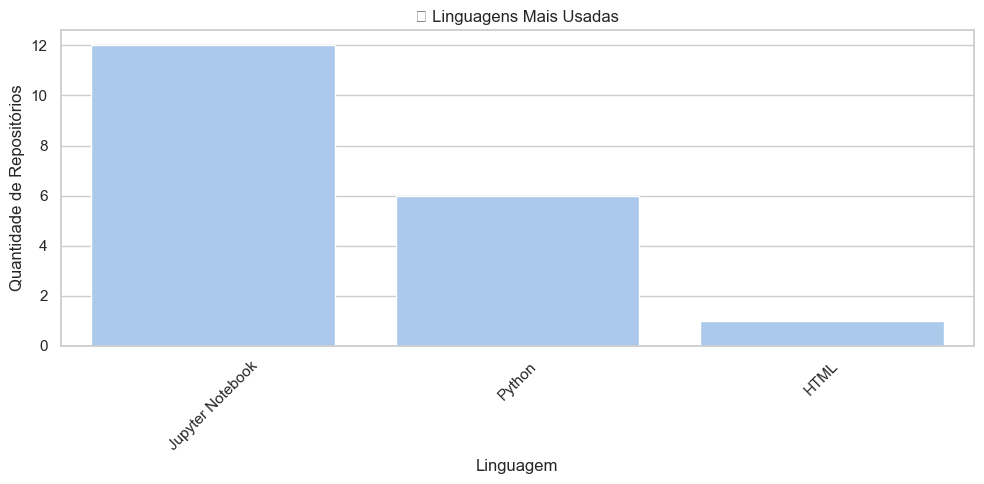

In [28]:

# Configurações visuais do seaborn
sns.set(style="whitegrid", palette="pastel")

# --- 1. Análise de criação por mês/ano ---

# Cria uma coluna "Ano-Mês"
df["Ano-Mês"] = pd.to_datetime(df["Data de Criação"]).dt.to_period("M").astype(str)

# Conta quantos repositórios foram criados por mês
criacoes_por_mes = df["Ano-Mês"].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=criacoes_por_mes.index, y=criacoes_por_mes.values)
plt.xticks(rotation=45)
plt.title("📈 Repositórios Criados por Mês")
plt.xlabel("Mês/Ano")
plt.ylabel("Quantidade de Repositórios")
plt.tight_layout()
plt.show()

# --- 2. Análise da linguagem mais usada ---

# Conta as ocorrências de cada linguagem (ignora valores nulos)
linguagens = df["Linguagem"].dropna().value_counts()

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=linguagens.index, y=linguagens.values)
plt.title("💻 Linguagens Mais Usadas")
plt.xlabel("Linguagem")
plt.ylabel("Quantidade de Repositórios")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
